## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline


## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [16]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
csvpath = Path("./Resources/bitstamp.csv")


bitstamp_df = pd.read_csv(
    Path("./Resources/bitstamp.csv"),
    index_col = "Timestamp", 
    parse_dates = True,
    infer_datetime_format = True
)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [17]:
# Use the head (and/or tail) function to confirm that the data was imported properly.

bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [18]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
csvpath = Path("./Resources/coinbase.csv")


coinbase_df = pd.read_csv(
    Path("./Resources/coinbase.csv"),
    index_col = "Timestamp", 
    parse_dates = True,
    infer_datetime_format = True
)



In [19]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase_df.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [20]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp_df.dropna()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,$432.52,4.117318,1776.650476,431.506725
...,...,...,...,...,...,...,...
2019-01-07 23:54:00,3980.50,3981.00,3980.22,$3980.33,8.043889,32017.759767,3980.383250
2019-01-07 23:55:00,3977.81,3977.81,3977.81,$3977.81,0.008042,31.988752,3977.810000
2019-01-07 23:57:00,3977.81,3984.40,3977.81,$3984.4,8.907403,35464.870894,3981.504964


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [22]:
# Use the str.replace function to remove the dollar sign, $
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].str.replace("$", "")
bitstamp_df


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,nan,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,430.54,5.558156,2397.461993,431.341280
...,...,...,...,...,...,...,...
2019-01-07 23:55:00,3977.81,3977.81,3977.81,3977.81,0.008042,31.988752,3977.810000
2019-01-07 23:56:00,NaN,NaN,NaN,nan,NaN,NaN,NaN
2019-01-07 23:57:00,3977.81,3984.40,3977.81,3984.4,8.907403,35464.870894,3981.504964


### Step 3: Convert the data type of the Close column to a `float`.

In [23]:
# Convert the Close data type to a float
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].astype("float")
bitstamp_df


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,430.54,5.558156,2397.461993,431.341280
...,...,...,...,...,...,...,...
2019-01-07 23:55:00,3977.81,3977.81,3977.81,3977.81,0.008042,31.988752,3977.810000
2019-01-07 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07 23:57:00,3977.81,3984.40,3977.81,3984.40,8.907403,35464.870894,3981.504964


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [24]:
# Review the data for duplicate values, and drop them if necessary
bitstamp_df = bitstamp_df.drop_duplicates()
bitstamp_df


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,430.54,5.558156,2397.461993,431.341280
...,...,...,...,...,...,...,...
2019-01-07 23:54:00,3980.50,3981.00,3980.22,3980.33,8.043889,32017.759767,3980.383250
2019-01-07 23:55:00,3977.81,3977.81,3977.81,3977.81,0.008042,31.988752,3977.810000
2019-01-07 23:57:00,3977.81,3984.40,3977.81,3984.40,8.907403,35464.870894,3981.504964


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [25]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase_df.dropna()
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].str.replace("$", "")
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].astype("float")
coinbase_df = coinbase_df.drop_duplicates()
coinbase_df

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,430.40,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,430.40,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,430.96,12.114161,5216.297064,430.595001
...,...,...,...,...,...,...,...
2019-01-07 17:02:00,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2019-01-07 17:03:00,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233
2019-01-07 17:04:00,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635


## Analyze the Data

Your analysis consists of the following steps:

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [32]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_df.iloc[:, [3]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()


,Close
Timestamp,
2015-12-31 19:01:00,430.89
2015-12-31 19:02:00,430.89
2015-12-31 19:03:00,NaN
2015-12-31 19:04:00,431.06
2015-12-31 19:05:00,430.54


In [33]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_df.iloc[:, [3]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2015-12-31 19:01:00,430.40
2015-12-31 19:02:00,430.40
2015-12-31 19:03:00,430.36
2015-12-31 19:04:00,430.39
2015-12-31 19:05:00,430.96


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [35]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe(include='all')


,Close
count,1.347772e+06
mean,4.503924e+03
std,3.956149e+03
min,1.500000e+00
25%,7.888900e+02
50%,3.788990e+03
75%,6.929443e+03
max,1.966575e+04


In [36]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe(include='all')


,Close
count,1.549523e+06
mean,4.091926e+03
std,3.913501e+03
min,6.000000e-02
25%,6.754000e+02
50%,2.710730e+03
75%,6.593500e+03
max,1.989199e+04


<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

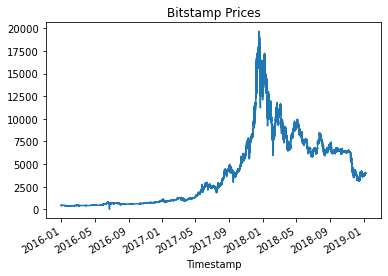

In [42]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced['Close'].plot(title="Bitstamp Prices")



<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

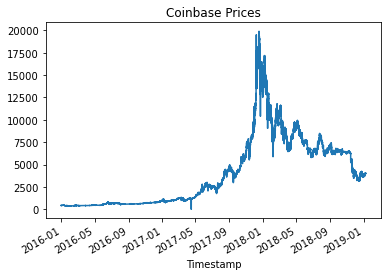

In [43]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced['Close'].plot(title="Coinbase Prices")


<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

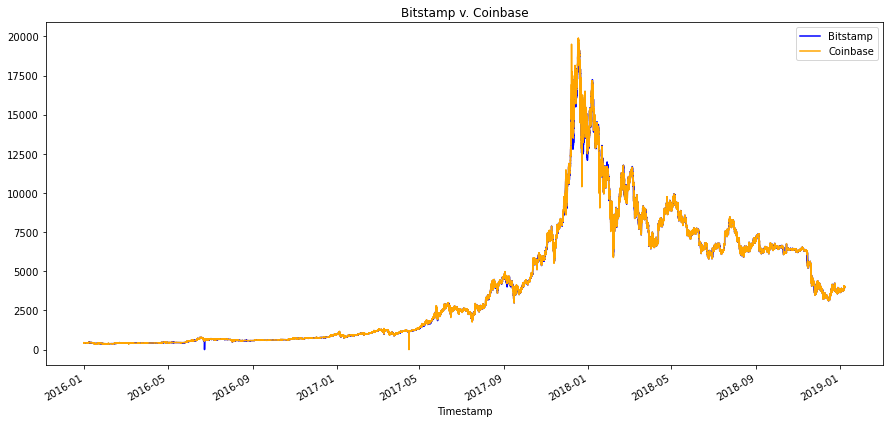

In [44]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")



<AxesSubplot:title={'center':'Exchange Comparison (Earlier Time Period)'}, xlabel='Timestamp'>

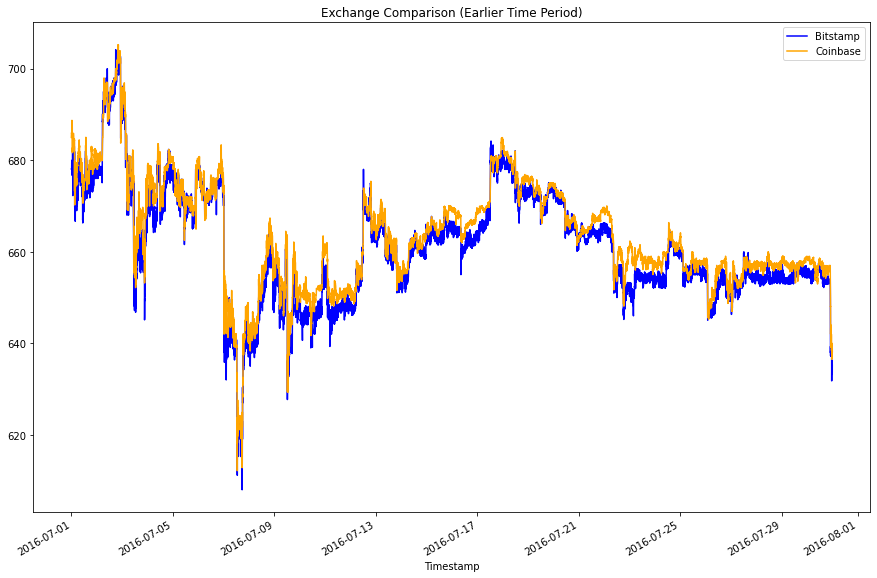

In [45]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].loc['2016-07-01' : '2016-07-30'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison (Earlier Time Period)", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2016-07-01' : '2016-07-30'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Exchange Comparison (Earlier Time Period)'}, xlabel='Timestamp'>

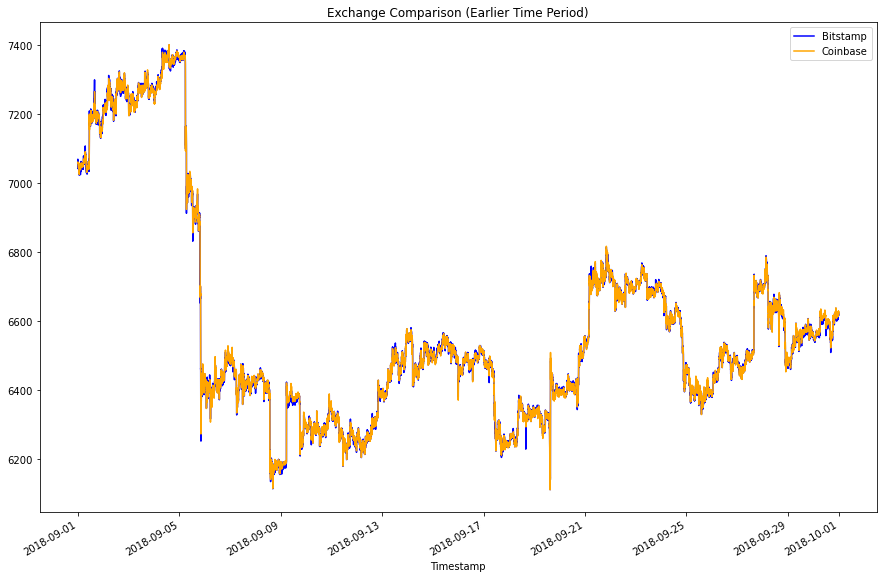

In [46]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced['Close'].loc['2018-09-01' : '2018-09-30'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison (Earlier Time Period)", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-09-01' : '2018-09-30'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")


**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** # YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the last year of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'July 22, 2016'}, xlabel='Timestamp'>

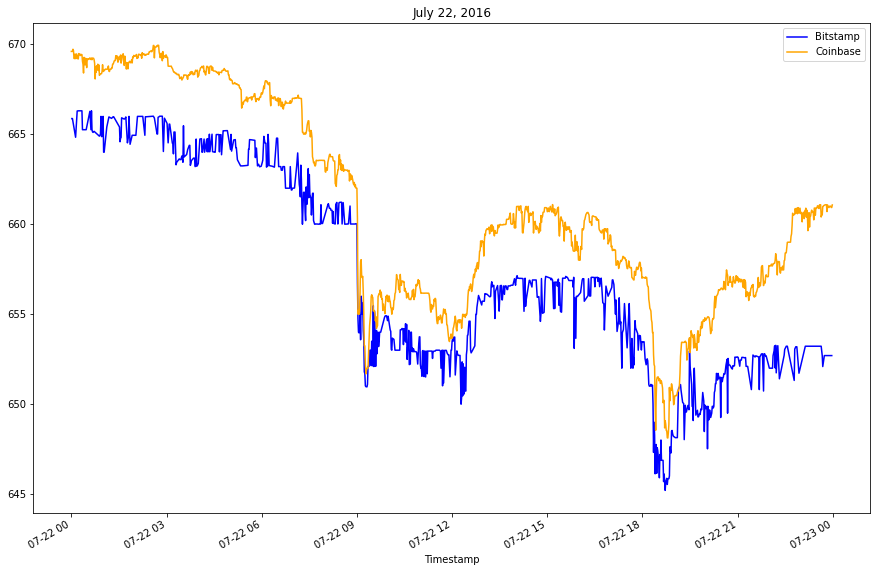

In [47]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2016-07-22'].plot(
    legend=True, figsize=(15, 10), title="July 22, 2016", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2016-07-22'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")


In [48]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced['Close'].loc['2016-07-22'] - bitstamp_sliced['Close'].loc['2016-07-22']


# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()


count    806.000000
mean       3.572146
std        1.332831
min       -0.290000
25%        2.825000
50%        3.550000
75%        4.397500
max        9.210000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Spread'}>

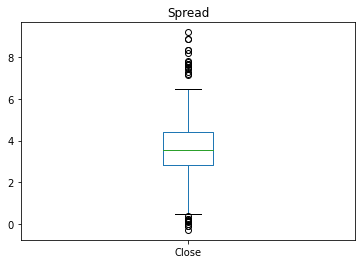

In [54]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_early.loc['2016-07-22'].plot(kind="box",title="Spread")


<AxesSubplot:title={'center':'September 15, 2017'}, xlabel='Timestamp'>

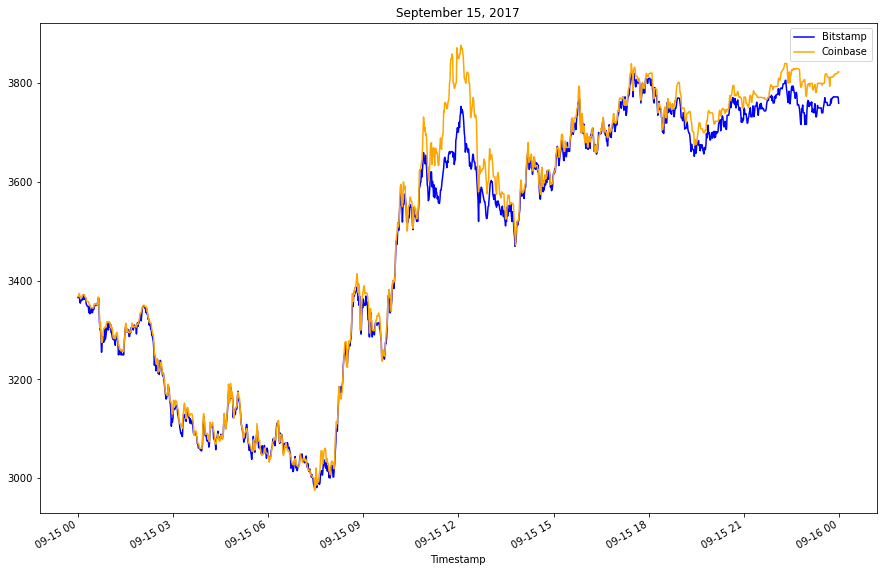

In [51]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2017-09-15'].plot(
    legend=True, figsize=(15, 10), title="September 15, 2017", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2017-09-15'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")


In [52]:
# Using the date form the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-09-15'] - bitstamp_sliced['Close'].loc['2018-09-15']

# Generate summary statistics for the middle DataFrame
arbitrage_spread_middle.describe()


count    1065.000000
mean       -1.891587
std         4.177777
min       -13.010000
25%        -4.840000
50%        -2.040000
75%         0.700000
max        13.980000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Spread'}>

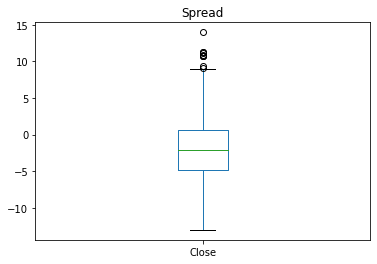

In [53]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_middle.loc['2018-09-15'].plot(kind="box", title="Spread")


<AxesSubplot:title={'center':'September 18, 2018'}, xlabel='Timestamp'>

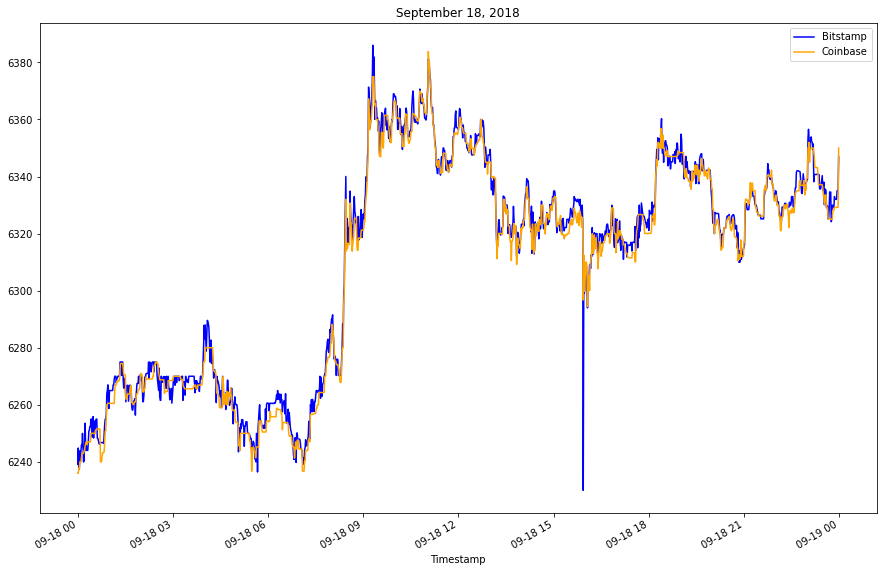

In [56]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018-09-18'].plot(
    legend=True, figsize=(15, 10), title="September 18, 2018", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-09-18'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")


In [57]:
# Using th date from late in the dataset that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-09-18'] - bitstamp_sliced['Close'].loc['2018-09-18']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()


count    1333.000000
mean       -1.551643
std         3.797280
min       -12.840000
25%        -3.930000
50%        -1.680000
75%         0.510000
max        66.710000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Spread'}>

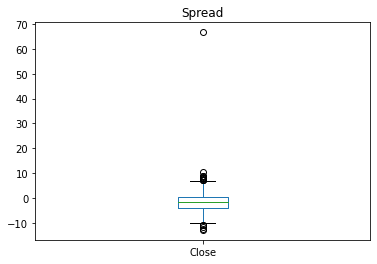

In [58]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_late.loc['2018-09-18'].plot(kind="box", title="Spread")


### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

In [72]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced['Close'].loc['2016-07-22'] - bitstamp_sliced['Close'].loc['2016-07-22']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
spread_profit = arbitrage_spread_early[arbitrage_spread_early>0]
spread_profit.describe()


count    803.000000
mean       3.586065
std        1.315651
min        0.010000
25%        2.845000
50%        3.560000
75%        4.400000
max        9.210000
Name: Close, dtype: float64

In [73]:
# For the from the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-09-15'] - bitstamp_sliced['Close'].loc['2018-09-15']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
spread_profit = arbitrage_spread_middle[arbitrage_spread_middle>0]
spread_profit.describe()


count    320.000000
mean       3.040625
std        2.654357
min        0.010000
25%        1.100000
50%        2.220000
75%        4.400000
max       13.980000
Name: Close, dtype: float64

In [75]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-09-18'] - bitstamp_sliced['Close'].loc['2018-09-18']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
spread_profit = arbitrage_spread_late[arbitrage_spread_late>0]
spread_profit.describe()


count    403.000000
mean       2.388288
std        3.719667
min        0.010000
25%        0.830000
50%        1.810000
75%        3.180000
max       66.710000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [76]:
# For the date early in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0) by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / bitstamp_sliced['Close'].loc['2016-07-22']

# Review the spread return DataFrame
spread_return_early.head()


Timestamp
2016-07-22 00:01:00    0.005602
2016-07-22 00:02:00    0.005602
2016-07-22 00:08:00    0.006573
2016-07-22 00:11:00    0.004367
2016-07-22 00:14:00    0.004773
Name: Close, dtype: float64

In [77]:
# For the date in the middle of the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / bitstamp_sliced['Close'].loc['2018-09-15']

# Review the spread return DataFrame
spread_return_middle.head()


Timestamp
2018-09-15 00:02:00   NaN
2018-09-15 00:03:00   NaN
2018-09-15 00:04:00   NaN
2018-09-15 00:05:00   NaN
2018-09-15 00:09:00   NaN
Name: Close, dtype: float64

In [78]:
# For the date late in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / bitstamp_sliced['Close'].loc['2018-09-18']

# Review the spread return DataFrame
spread_return_late.head()

Timestamp
2018-09-18 00:00:00         NaN
2018-09-18 00:01:00         NaN
2018-09-18 00:02:00         NaN
2018-09-18 00:03:00    0.000042
2018-09-18 00:04:00         NaN
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [84]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
arbitrage_spread_early = coinbase_sliced['Close'].loc['2016-07-22'] - bitstamp_sliced['Close'].loc['2016-07-22']
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / bitstamp_sliced['Close'].loc['2016-07-22']
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()


Timestamp
2016-07-22 20:03:00    0.011305
2016-07-22 20:28:00    0.011028
2016-07-22 20:41:00    0.011809
2016-07-22 22:47:00    0.014141
2016-07-22 22:48:00    0.011469
Name: Close, dtype: float64

In [87]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-09-15'] - bitstamp_sliced['Close'].loc['2018-09-15']
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / bitstamp_sliced['Close'].loc['2018-09-15']
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head(5)


Series([], Name: Close, dtype: float64)

In [88]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-09-18'] - bitstamp_sliced['Close'].loc['2018-09-18']
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / bitstamp_sliced['Close'].loc['2018-09-18']
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head()


Timestamp
2018-09-18 15:56:00    0.010708
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [89]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
arbitrage_spread_early = coinbase_sliced['Close'].loc['2016-07-22'] - bitstamp_sliced['Close'].loc['2016-07-22']
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / bitstamp_sliced['Close'].loc['2016-07-22']
profitable_trades_early = spread_return_early[spread_return_early > .01]


profitable_trades_early.describe()


count    18.000000
mean      0.012131
std       0.000936
min       0.010992
25%       0.011484
50%       0.011799
75%       0.012747
max       0.014141
Name: Close, dtype: float64

In [90]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-09-15'] - bitstamp_sliced['Close'].loc['2018-09-15']
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / bitstamp_sliced['Close'].loc['2018-09-15']
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]


profitable_trades_middle.describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [91]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-09-18'] - bitstamp_sliced['Close'].loc['2018-09-18']
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / bitstamp_sliced['Close'].loc['2018-09-18']
profitable_trades_late = spread_return_late[spread_return_late > .01]


profitable_trades_late.describe()


count    1.000000
mean     0.010708
std           NaN
min      0.010708
25%      0.010708
50%      0.010708
75%      0.010708
max      0.010708
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [96]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
arbitrage_spread_early = coinbase_sliced['Close'].loc['2016-07-22'] - bitstamp_sliced['Close'].loc['2016-07-22']
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / bitstamp_sliced['Close'].loc['2016-07-22']
profitable_trades_early = spread_return_early[spread_return_early > .01]
profit_early = profitable_trades_early * bitstamp_sliced['Close'].loc['2016-07-22']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()


Timestamp
2016-07-22 20:03:00    7.32
2016-07-22 20:28:00    7.16
2016-07-22 20:41:00    7.67
2016-07-22 22:47:00    9.21
2016-07-22 22:48:00    7.49
Name: Close, dtype: float64

In [97]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-09-15'] - bitstamp_sliced['Close'].loc['2018-09-15']
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / bitstamp_sliced['Close'].loc['2018-09-15']
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]
profit_middle = profitable_trades_middle * bitstamp_sliced['Close'].loc['2018-09-15']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle.head()



Series([], Name: Close, dtype: float64)

In [98]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-09-18'] - bitstamp_sliced['Close'].loc['2018-09-18']
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / bitstamp_sliced['Close'].loc['2018-09-18']
profitable_trades_late = spread_return_late[spread_return_late > .01]
profit_late = profitable_trades_late * bitstamp_sliced['Close'].loc['2018-09-18']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late.head()

Timestamp
2018-09-18 15:56:00    66.71
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [99]:
# Generate the summary statistics for the early profit per trade DataFrame

profit_per_trade_early.describe()

count    18.000000
mean      7.910556
std       0.611666
min       7.160000
25%       7.500000
50%       7.695000
75%       8.320000
max       9.210000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early Trade Profit'}, xlabel='Timestamp'>

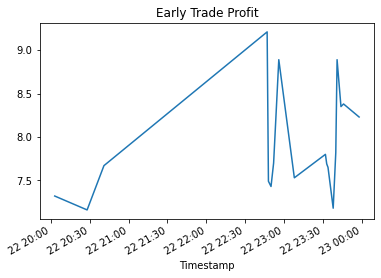

In [116]:
# Plot the results for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_early.plot(title="Early Trade Profit")

In [101]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Middle Trade Profit'}, xlabel='Timestamp'>

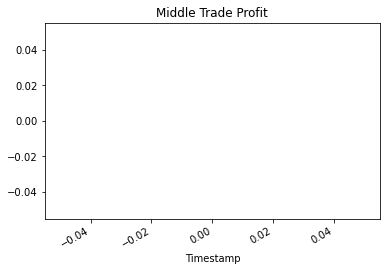

In [102]:
# Plot the results for the middle profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_middle.plot(title="Middle Trade Profit")


In [103]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()


count     1.00
mean     66.71
std        NaN
min      66.71
25%      66.71
50%      66.71
75%      66.71
max      66.71
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Late Trade Profit'}, xlabel='Timestamp'>

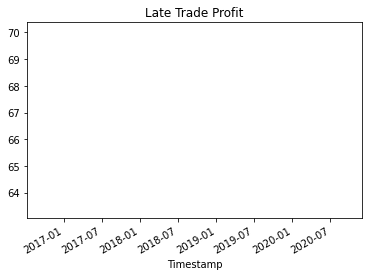

In [104]:
# Plot the results for the late profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_late.plot(title="Late Trade Profit")


#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [105]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()


142.3899999999993

In [106]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_per_trade_middle.sum()


0.0

In [107]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_per_trade_late.sum()


66.71000000000004

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [109]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()


<AxesSubplot:title={'center':'Cumulative Early Profits'}, xlabel='Timestamp'>

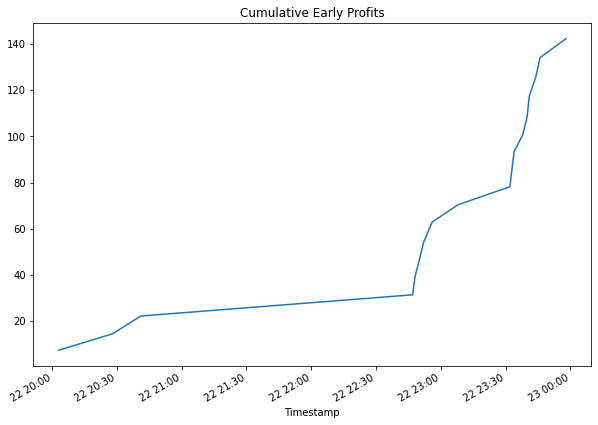

In [110]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Early Profits")

In [111]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()


<AxesSubplot:title={'center':'Cumulative Middle Profits'}, xlabel='Timestamp'>

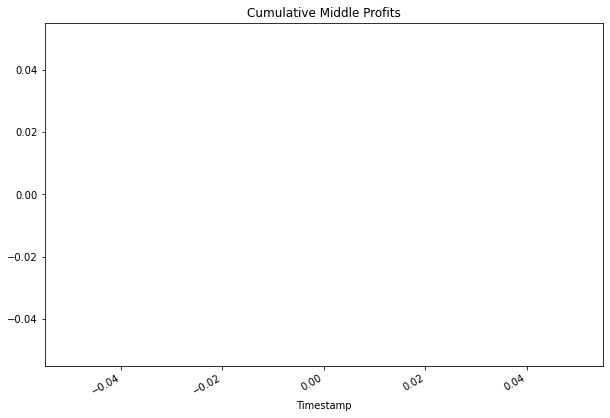

In [112]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Middle Profits")


In [113]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()


<AxesSubplot:title={'center':'Cumulative Late Profits'}, xlabel='Timestamp'>

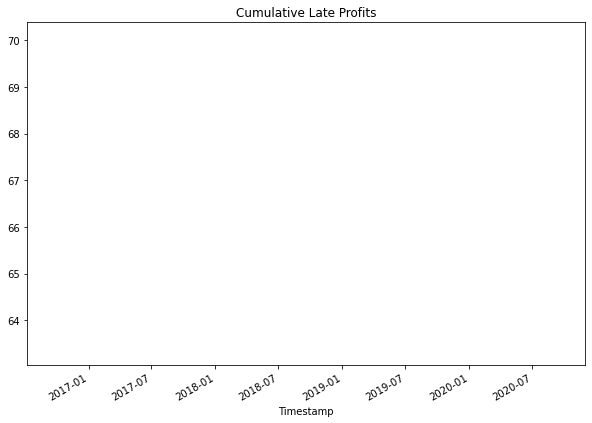

In [114]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative Late Profits")


**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Arbitrage profits are extremely hard to come by at the market for Bitcoin matures across time. As Bitcoin grows in populatiry, the prices across the two exhanges trade more in line with one another. That makes is very difficult find a point where the price difference exceeds the minimum profit threshold of 1%.

Analysis Report: Arbitrage profit oppurtunities between Coinbase and Bitstamp Bitcoin Exchanges were greatest during 2015-2016. On July 22nd, 2016, there were 803 oppurtunities. 